# TRATAMENTOS DOS DADOS<br>

> ## Micro dados inep: dataset Escolas.csv

In [3]:
#diretorio_datasets = "/home/matteus-paula/Downloads/dados_tcc/inep"
diretorio_datasets = "/home/caioabreu/workspace/tcc/datasets/educacao-basica/inep"

Inclusão da biblioteca Pandas do Python para exploratoria e analise dos dados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dados_escolas = pd.read_csv(f'{diretorio_datasets}/ESCOLAS.CSV', 
                            delimiter="|", encoding = "ISO-8859-1")

/home/caioabreu/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
dados_escolas.head()

,NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
0,2017,50032062,CENTRO DE EDUCACAO INFANTIL GERALDO ANTONIO LOPES,NaN,1,06/02/2017,11/12/2017,5,5004,50010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,11016094,IEE MARECHAL RONDON,00007,1,06/02/2017,29/12/2017,1,1102,11004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,21079196,ESCOLA MUNICIPAL BARRO BRANCO,00004,1,21/02/2017,29/12/2017,2,2102,21008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,51062879,ESCOLA MUNICIPAL PROFESSORA MARIA LUIZA DE ARA...,51021,1,13/02/2017,21/12/2017,5,5104,51017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,31051659,EM JOSE LEOCADIO DOS SANTOS,00039,1,06/02/2017,15/12/2017,3,3108,31036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filtrando as escolas, de acordo com os filtros informados pela documentação: 
- O filtro TP_SITUACAO_FUNCIONAMENTO=1 diz respeito à escola que está Em atividade
- O filtro (IN_REGULAR=1 OR IN_EJA=1 OR IN_PROFISSIONALIZANTE=1) diz respeito às escolas com pelo menos uma matrícula em turma de Escolarização.

In [7]:
escolas = dados_escolas.loc[(dados_escolas['TP_SITUACAO_FUNCIONAMENTO'] == 1) 
                      & (
                          (dados_escolas['IN_REGULAR'] == 1)
                            |(dados_escolas['IN_EJA'] == 1
                             |(dados_escolas['IN_PROFISSIONALIZANTE'] == 1))
                      )]

## Filtrando somente as escolas do ensino Publico

In [8]:
escolas = escolas.loc[(escolas['TP_DEPENDENCIA'] >= 1) & (escolas['TP_DEPENDENCIA'] <= 3)]
escolas.head()

,NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
0,2017,50032062,CENTRO DE EDUCACAO INFANTIL GERALDO ANTONIO LOPES,NaN,1,06/02/2017,11/12/2017,5,5004,50010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,11016094,IEE MARECHAL RONDON,00007,1,06/02/2017,29/12/2017,1,1102,11004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,21079196,ESCOLA MUNICIPAL BARRO BRANCO,00004,1,21/02/2017,29/12/2017,2,2102,21008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,51062879,ESCOLA MUNICIPAL PROFESSORA MARIA LUIZA DE ARA...,51021,1,13/02/2017,21/12/2017,5,5104,51017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,31051659,EM JOSE LEOCADIO DOS SANTOS,00039,1,06/02/2017,15/12/2017,3,3108,31036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ### Seleção das variaveis a serem estudadas

In [40]:
df_all = escolas[['CO_ENTIDADE', 'TP_DEPENDENCIA', 
                  'CO_UF', 'CO_MUNICIPIO',
                  'IN_COMUM_PRE', 'IN_COMUM_FUND_AI', 
                  'IN_COMUM_FUND_AF', 'IN_COMUM_MEDIO_NORMAL',
                  'IN_COMUM_MEDIO_MEDIO', 'IN_COMUM_MEDIO_INTEGRADO', 
                  'IN_AGUA_INEXISTENTE', 'IN_AGUA_FILTRADA', 
                  'IN_ESGOTO_INEXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                 'IN_BANHEIRO_FORA_PREDIO', 'IN_BANHEIRO_DENTRO_PREDIO', 
                 'IN_REFEITORIO', 'IN_AUDITORIO',
                 'IN_COMPUTADOR', 'IN_INTERNET',
                 'IN_BANDA_LARGA', 'IN_ALIMENTACAO',
                 'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO',
                 'IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                 'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_INEXISTENTE', 
                 'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES', 
                 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
                 'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
                 'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA',
                 'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR']]

- ### Obtendo os dados de matrícula

In [19]:
df_matricula_CO = pd.read_csv('{}/MATRICULA_CO.CSV'.format(diretorio_datasets),
                                          delimiter="|", 
                                          encoding = "ISO-8859-1",
                                          usecols=['CO_ENTIDADE',
                                                   'TP_ETAPA_ENSINO'])
df_matricula_CO = df_matricula_CO['CO_ENTIDADE'].loc[(df_matricula_CO['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_CO.count()

2237

In [20]:
df_matricula_NORDESTE = pd.read_csv('{}/MATRICULA_NORDESTE.CSV'.format(diretorio_datasets),
                                          delimiter="|", 
                                          encoding = "ISO-8859-1",
                                          usecols=['CO_ENTIDADE',
                                                   'TP_ETAPA_ENSINO'])
df_matricula_NORDESTE = df_matricula_NORDESTE['CO_ENTIDADE'].loc[(df_matricula_NORDESTE['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_NORDESTE.count()

7075

In [21]:
df_matricula_NORTE = pd.read_csv('{}/MATRICULA_NORTE.CSV'.format(diretorio_datasets),
                                 delimiter="|", 
                                 encoding = "ISO-8859-1",
                                 usecols=['CO_ENTIDADE',
                                          'TP_ETAPA_ENSINO'])
df_matricula_NORTE = df_matricula_NORTE['CO_ENTIDADE'].loc[(df_matricula_NORTE['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_NORTE.count()

2390

In [22]:
df_matricula_SUDESTE = pd.read_csv('{}/MATRICULA_SUDESTE.CSV'.format(diretorio_datasets),
                                   delimiter="|", 
                                   encoding = "ISO-8859-1",
                                   usecols=['CO_ENTIDADE',
                                            'TP_ETAPA_ENSINO'])
df_matricula_SUDESTE = df_matricula_SUDESTE['CO_ENTIDADE'].loc[(df_matricula_SUDESTE['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_SUDESTE.count()

12368

In [24]:
df_matricula_SUL = pd.read_csv('{}/MATRICULA_SUL.CSV'.format(diretorio_datasets),
                               delimiter="|", 
                               encoding = "ISO-8859-1",
                               usecols=['CO_ENTIDADE',
                                        'TP_ETAPA_ENSINO'])
df_matricula_SUL = df_matricula_SUL['CO_ENTIDADE'].loc[(df_matricula_SUL['TP_ETAPA_ENSINO'].isin([25,26,27,28,29,30,31,32,33,34,35,36,37,38]))].drop_duplicates()
df_matricula_SUL.count()

4488

In [25]:
df_matricula = pd.concat([df_matricula_CO, 
                            df_matricula_NORDESTE, 
                            df_matricula_NORTE, 
                            df_matricula_SUDESTE,
                            df_matricula_SUL])
df_matricula.count()

28558

- ### Removendo as escolas que não ministrem aulas para o Ensino Médio

In [41]:
df_all = pd.merge(left=df_all, right=df_matricula, left_on='CO_ENTIDADE', right_on='CO_ENTIDADE')
df_all.count()

CO_ENTIDADE                   20287
TP_DEPENDENCIA                20287
CO_UF                         20287
CO_MUNICIPIO                  20287
IN_COMUM_PRE                  20287
IN_COMUM_FUND_AI              20287
IN_COMUM_FUND_AF              20287
IN_COMUM_MEDIO_NORMAL         20287
IN_COMUM_MEDIO_MEDIO          20287
IN_COMUM_MEDIO_INTEGRADO      20287
IN_AGUA_INEXISTENTE           20287
IN_AGUA_FILTRADA              20287
IN_ESGOTO_INEXISTENTE         20287
IN_BIBLIOTECA_SALA_LEITURA    20287
IN_BANHEIRO_FORA_PREDIO       20287
IN_BANHEIRO_DENTRO_PREDIO     20287
IN_REFEITORIO                 20287
IN_AUDITORIO                  20287
IN_COMPUTADOR                 20287
IN_INTERNET                   20287
IN_BANDA_LARGA                20287
IN_ALIMENTACAO                20287
IN_PATIO_COBERTO              20287
IN_PATIO_DESCOBERTO           20287
IN_AREA_VERDE                 20287
IN_LABORATORIO_CIENCIAS       20287
IN_LABORATORIO_INFORMATICA    20287
IN_ENERGIA_INEXISTENTE      

- ### Verificando a variação e a distribuição dos dados

In [43]:
df_all.describe()

,CO_ENTIDADE,TP_DEPENDENCIA,CO_UF,CO_MUNICIPIO,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_NORMAL,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,...,IN_LIXO_RECICLA,IN_QUADRA_ESPORTES,IN_EQUIP_TV,IN_EQUIP_DVD,IN_EQUIP_PARABOLICA,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_MULTIMIDIA,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR
count,2.028700e+04,20287.000000,20287.000000,2.028700e+04,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000,...,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000,20287.000000
mean,3.239630e+07,1.984867,32.257258,3.242209e+06,0.013654,0.216444,0.675802,0.054567,0.944842,0.085227,...,0.072559,0.743185,0.917188,0.778824,0.446739,0.551092,0.805639,0.867008,0.443683,0.372554
std,9.732820e+06,0.197634,9.733753,9.758028e+05,0.116053,0.411831,0.468086,0.227139,0.228295,0.279226,...,0.259417,0.436887,0.275604,0.415049,0.497167,0.497395,0.395718,0.339574,0.496831,0.483497
min,1.100026e+07,1.000000,11.000000,1.100015e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.607598e+07,2.000000,26.000000,2.607777e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,3.303303e+07,2.000000,33.000000,3.301702e+06,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,4.100341e+07,2.000000,41.000000,4.101200e+06,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.306818e+07,3.000000,53.000000,5.300108e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- ### Verificando os dados omissos

In [44]:
df_all.isnull().any()

CO_ENTIDADE                   False
TP_DEPENDENCIA                False
CO_UF                         False
CO_MUNICIPIO                  False
IN_COMUM_PRE                  False
IN_COMUM_FUND_AI              False
IN_COMUM_FUND_AF              False
IN_COMUM_MEDIO_NORMAL         False
IN_COMUM_MEDIO_MEDIO          False
IN_COMUM_MEDIO_INTEGRADO      False
IN_AGUA_INEXISTENTE           False
IN_AGUA_FILTRADA              False
IN_ESGOTO_INEXISTENTE         False
IN_BIBLIOTECA_SALA_LEITURA    False
IN_BANHEIRO_FORA_PREDIO       False
IN_BANHEIRO_DENTRO_PREDIO     False
IN_REFEITORIO                 False
IN_AUDITORIO                  False
IN_COMPUTADOR                 False
IN_INTERNET                   False
IN_BANDA_LARGA                False
IN_ALIMENTACAO                False
IN_PATIO_COBERTO              False
IN_PATIO_DESCOBERTO           False
IN_AREA_VERDE                 False
IN_LABORATORIO_CIENCIAS       False
IN_LABORATORIO_INFORMATICA    False
IN_ENERGIA_INEXISTENTE      

- ### Verificando dados duplicados

In [45]:
print(df_all['CO_ENTIDADE'].count())
print(df_all['CO_ENTIDADE'].drop_duplicates().count())

20287
20287


In [46]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20287 entries, 0 to 20286
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CO_ENTIDADE                 20287 non-null  int64  
 1   TP_DEPENDENCIA              20287 non-null  int64  
 2   CO_UF                       20287 non-null  int64  
 3   CO_MUNICIPIO                20287 non-null  int64  
 4   IN_COMUM_PRE                20287 non-null  float64
 5   IN_COMUM_FUND_AI            20287 non-null  float64
 6   IN_COMUM_FUND_AF            20287 non-null  float64
 7   IN_COMUM_MEDIO_NORMAL       20287 non-null  float64
 8   IN_COMUM_MEDIO_MEDIO        20287 non-null  float64
 9   IN_COMUM_MEDIO_INTEGRADO    20287 non-null  float64
 10  IN_AGUA_INEXISTENTE         20287 non-null  float64
 11  IN_AGUA_FILTRADA            20287 non-null  float64
 12  IN_ESGOTO_INEXISTENTE       20287 non-null  float64
 13  IN_BIBLIOTECA_SALA_LEITURA  202

<br>

<br>

# ANALISES<br>

In [47]:
escolas_federais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 1)]
print(escolas_federais['CO_ENTIDADE'].count())

escolas_estaduais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 2)]
print(escolas_estaduais['CO_ENTIDADE'].count())

escolas_municipais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 3)]
print(escolas_municipais['CO_ENTIDADE'].count())


# EDUCAÇÃO BASICA

# 611 ESCOLAS DE NIVEL FEDERAL 
# 30.175 ESCOLAS DE NIVEL ESTADUAL
# 110.177 ESCOLAS DE NIVEL MUNICIPAL
# 38.470 ESCOLAS DE NIVEL PRIVADA

584
30340
112858


In [48]:
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 1, 'IN_AGUA_EXISTENTE'] = 0
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 0, 'IN_AGUA_EXISTENTE'] = 1

df_all['IN_AGUA_EXISTENTE'].count()

20287

In [49]:
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 1, 'IN_ENERGIA_EXISTENTE'] = 0
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 0, 'IN_ENERGIA_EXISTENTE'] = 1

df_all['IN_ENERGIA_EXISTENTE'].count()

20287

In [50]:
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 1, 'IN_ESGOTO_EXISTENTE'] = 0
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 0, 'IN_ESGOTO_EXISTENTE'] = 1

df_all['IN_ESGOTO_EXISTENTE'].count()

20287

In [19]:
# Transformando as variaveis de ensino fundamental em uma unica variavel
df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 1) | (df_all['IN_COMUM_FUND_AF'] == 1), 'IN_COMUM_FUND'] = 1
df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 0) & (df_all['IN_COMUM_FUND_AF'] == 0), 'IN_COMUM_FUND'] = 0

# Transformando as variaveis de ensino medio em uma unica variavel
df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 1) 
           | (df_all['IN_COMUM_MEDIO_MEDIO'] == 1)
           | (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 1), 'IN_COMUM_MEDIO'] = 1

df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 0) 
           & (df_all['IN_COMUM_MEDIO_MEDIO'] == 0)
           & (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 0), 'IN_COMUM_MEDIO'] = 0

In [20]:
# Transformando as variaveis de BANHEIRO em uma unica variavel
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 1) | (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 1), 'IN_BANHEIRO'] = 1
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 0) & (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 0), 'IN_BANHEIRO'] = 0

In [21]:
# Transformando as variaveis de PATIO em uma unica variavel

df_all.loc[(df_all['IN_PATIO_COBERTO'] == 1) | (df_all['IN_PATIO_DESCOBERTO'] == 1), 'IN_PATIO'] = 1
df_all.loc[(df_all['IN_PATIO_COBERTO'] == 0) & (df_all['IN_PATIO_DESCOBERTO'] == 0), 'IN_PATIO'] = 0

In [22]:
df_final = df_all[
                ['CO_MUNICIPIO','CO_UF',
                 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA', 
                 'IN_ESGOTO_EXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                 'IN_BANHEIRO', 'IN_REFEITORIO', 'IN_AUDITORIO',
                 'IN_COMPUTADOR', 'IN_INTERNET',
                 'IN_BANDA_LARGA', 'IN_ALIMENTACAO',
                 'IN_PATIO','IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                 'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_EXISTENTE', 
                 'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES',
                 'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR']
                ].groupby(['CO_MUNICIPIO', 'CO_UF'], as_index=False) \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_final.head()

,CO_MUNICIPIO,CO_UF,IN_AGUA_EXISTENTE,IN_AGUA_FILTRADA,IN_ESGOTO_EXISTENTE,IN_BIBLIOTECA_SALA_LEITURA,IN_BANHEIRO,IN_REFEITORIO,IN_AUDITORIO,IN_COMPUTADOR,...,IN_ALIMENTACAO,IN_PATIO,IN_AREA_VERDE,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_ENERGIA_EXISTENTE,IN_LIXO_RECICLA,IN_QUADRA_ESPORTES,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR
0,1100015,11,100.0,100.0,94.12,26.47,85.29,23.53,0.00,52.94,...,100.0,58.82,2.94,5.88,14.71,91.18,2.94,41.18,11.76,2.94
1,1100023,11,100.0,100.0,100.00,68.42,100.00,81.58,44.74,100.00,...,100.0,94.74,36.84,18.42,73.68,100.00,5.26,68.42,50.00,47.37
2,1100031,11,100.0,100.0,100.00,25.00,75.00,62.50,0.00,100.00,...,100.0,62.50,12.50,0.00,25.00,100.00,37.50,50.00,12.50,12.50
3,1100049,11,100.0,100.0,97.96,40.82,97.96,57.14,12.24,97.96,...,100.0,79.59,46.94,14.29,36.73,100.00,4.08,44.90,38.78,26.53
4,1100056,11,100.0,100.0,100.00,28.57,100.00,21.43,14.29,100.00,...,100.0,100.00,50.00,7.14,28.57,100.00,7.14,57.14,42.86,21.43


In [23]:
df_final.count()

CO_MUNICIPIO                  5570
CO_UF                         5570
IN_AGUA_EXISTENTE             5570
IN_AGUA_FILTRADA              5570
IN_ESGOTO_EXISTENTE           5570
IN_BIBLIOTECA_SALA_LEITURA    5570
IN_BANHEIRO                   5570
IN_REFEITORIO                 5570
IN_AUDITORIO                  5570
IN_COMPUTADOR                 5570
IN_INTERNET                   5570
IN_BANDA_LARGA                5570
IN_ALIMENTACAO                5570
IN_PATIO                      5570
IN_AREA_VERDE                 5570
IN_LABORATORIO_CIENCIAS       5570
IN_LABORATORIO_INFORMATICA    5570
IN_ENERGIA_EXISTENTE          5570
IN_LIXO_RECICLA               5570
IN_QUADRA_ESPORTES            5570
IN_DEPENDENCIAS_PNE           5570
TP_ATIVIDADE_COMPLEMENTAR     5570
dtype: int64

In [24]:
df_final.to_csv(f'{diretorio_datasets}/escolas_set.csv', sep=';', encoding='utf-8', index=False)

<br>

In [25]:
df = df_all.pivot_table(columns='TP_DEPENDENCIA', values=['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_ENERGIA_EXISTENTE', 
              'IN_BANHEIRO','IN_REFEITORIO', 'IN_ALIMENTACAO',
             'IN_BIBLIOTECA_SALA_LEITURA', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET', 'IN_BANDA_LARGA', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_LIXO_RECICLA', 'IN_AREA_VERDE',
             'IN_PATIO', 'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA'], aggfunc=lambda x: round((x.sum() * 100) / x.count(), 2) )
df

TP_DEPENDENCIA,1,2,3
IN_AGUA_EXISTENTE,100.00,98.87,95.14
IN_AGUA_FILTRADA,92.12,82.36,84.00
IN_ALIMENTACAO,76.71,98.65,99.80
IN_AREA_VERDE,74.83,34.05,26.23
IN_AUDITORIO,77.91,16.07,5.38
IN_BANDA_LARGA,93.49,73.21,42.57
IN_BANHEIRO,99.14,86.64,90.88
IN_BIBLIOTECA_SALA_LEITURA,97.43,79.90,35.43
IN_COMPUTADOR,99.32,91.95,70.57
IN_ENERGIA_EXISTENTE,100.00,98.32,96.04


In [26]:
df_2 = df_all.where(df_all['IN_COMUM_FUND'] == 1)

df_2 = df_2[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA',
             'IN_AREA_VERDE','IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(),2))
df_2

IN_AGUA_FILTRADA              81.70
IN_AGUA_EXISTENTE             94.91
IN_BIBLIOTECA_SALA_LEITURA    48.01
IN_BANHEIRO                   90.65
IN_REFEITORIO                 33.63
IN_AUDITORIO                   7.66
IN_COMPUTADOR                 73.59
IN_INTERNET                   60.07
IN_BANDA_LARGA                47.43
IN_ALIMENTACAO                99.61
IN_LABORATORIO_CIENCIAS        8.11
IN_LABORATORIO_INFORMATICA    46.48
IN_ENERGIA_EXISTENTE          95.44
IN_LIXO_RECICLA                5.22
IN_AREA_VERDE                 26.40
IN_PATIO                      63.15
IN_QUADRA_ESPORTES            37.13
IN_EQUIP_TV                   75.14
IN_EQUIP_DVD                  68.59
IN_EQUIP_PARABOLICA           24.15
IN_EQUIP_COPIADORA            38.64
IN_EQUIP_IMPRESSORA           61.68
IN_EQUIP_MULTIMIDIA           58.62
dtype: float64

In [27]:
df_4 = df_all.where(df_all['IN_COMUM_MEDIO'] == 1)

print("Total de escolas ensino medio: " + str(df_4['CO_ENTIDADE'].count()))

df_4 = df_4[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA', 
             'IN_AREA_VERDE', 'IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(), 2))
df_4

Total de escolas ensino medio: 20277


IN_AGUA_FILTRADA              85.79
IN_AGUA_EXISTENTE             99.44
IN_BIBLIOTECA_SALA_LEITURA    86.16
IN_BANHEIRO                   87.58
IN_REFEITORIO                 49.83
IN_AUDITORIO                  22.62
IN_COMPUTADOR                 95.08
IN_INTERNET                   90.95
IN_BANDA_LARGA                77.12
IN_ALIMENTACAO                98.53
IN_LABORATORIO_CIENCIAS       40.19
IN_LABORATORIO_INFORMATICA    83.97
IN_ENERGIA_EXISTENTE          99.65
IN_LIXO_RECICLA                7.25
IN_AREA_VERDE                 37.28
IN_PATIO                      77.33
IN_QUADRA_ESPORTES            74.31
IN_EQUIP_TV                   91.71
IN_EQUIP_DVD                  77.88
IN_EQUIP_PARABOLICA           44.69
IN_EQUIP_COPIADORA            55.11
IN_EQUIP_IMPRESSORA           80.56
IN_EQUIP_MULTIMIDIA           86.69
dtype: float64

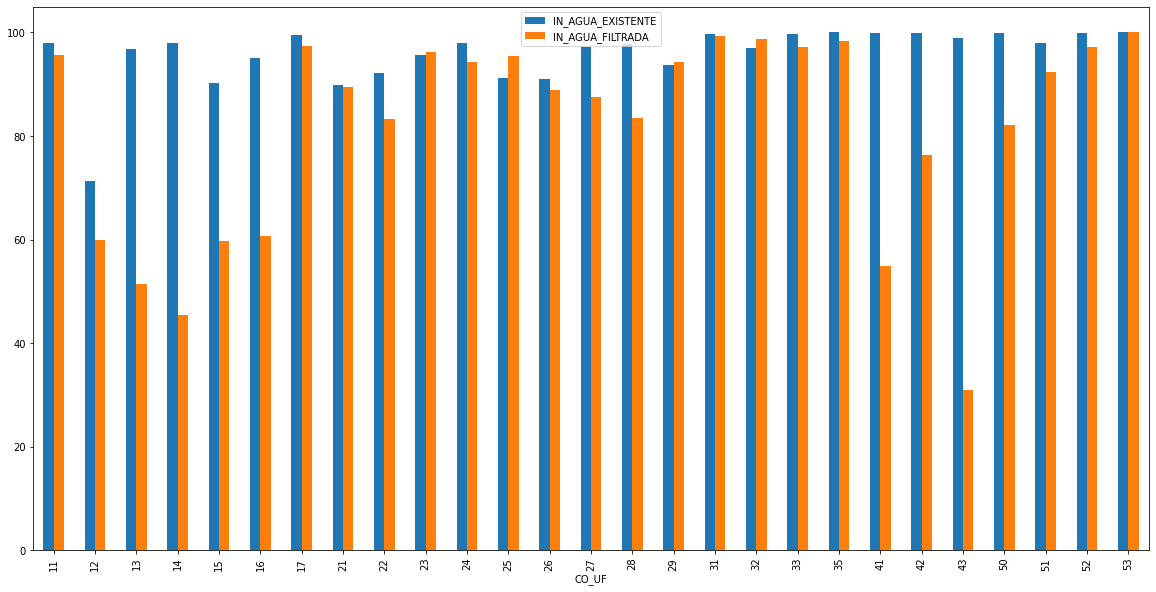

In [28]:
df_5 = df_all[['CO_UF', 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))

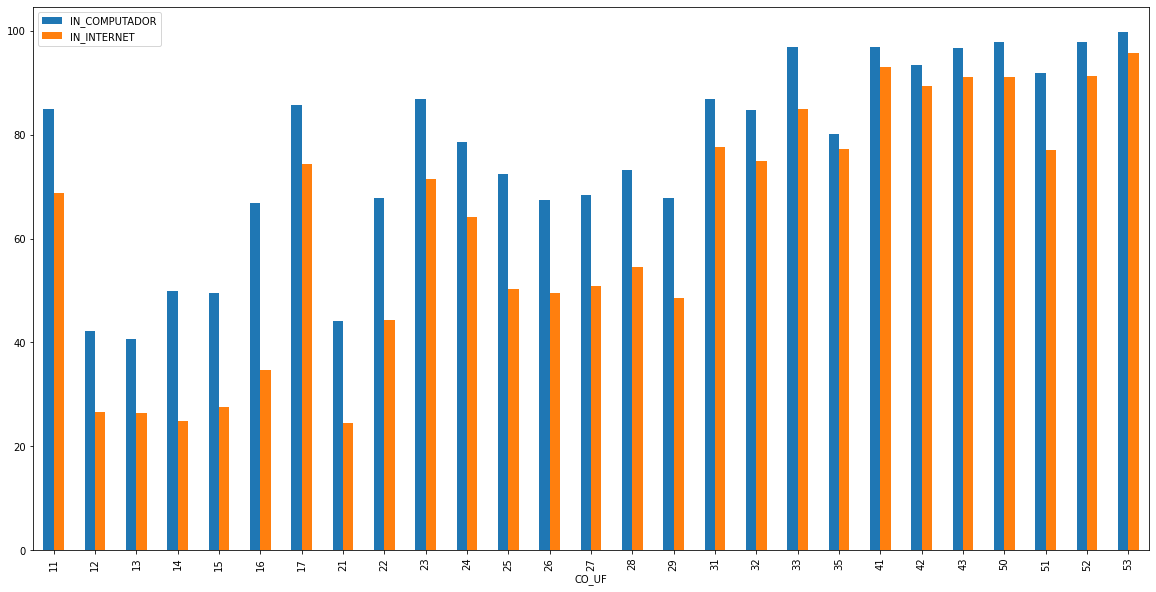

In [29]:
df_5 = df_all[['CO_UF', 'IN_COMPUTADOR', 'IN_INTERNET']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))